In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [4]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [5]:
# 3. Display some observations
df.head(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
6,6,2018.0,Mayo,2018-05-22 06:20:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,TLACOQUEMECATL,BENITO JUAREZ,2018-05-22 11:09:00,Mayo,2018,AV. DE LOS INSURGENTES SUR,NaN,-99.177100,19.379581,"19.3795809108,-99.1771001785"
7,7,2016.0,Enero,2016-01-02 21:20:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-1,UI-1CD,LOS REYES,IZTACALCO,2016-01-05 19:37:09,Enero,2016,AV PLUTARCO ELIAS CALLES,MIRAFUENTES,-99.117183,19.398040,"19.3980399998,-99.117183"
8,8,2017.0,Noviembre,2017-11-01 17:15:00,LESIONES INTENCIONALES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMZV,UI-1CD,CENTRO,CUAUHTEMOC,2017-11-01 18:48:18,Noviembre,2017,PLAZA DE LA CONSTITUCION,PINO SUAREZ,-99.132449,19.431791,"19.4317911274,-99.1324494018"
9,9,2016.0,Septiembre,2016-09-23 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1SD,LA PRADERA,GUSTAVO A MADERO,2018-05-22 11:40:31,Mayo,2018,FRANCISCO MORAZAN,NaN,-99.071243,19.475715,"19.4757145711,-99.0712426634"


In [6]:
# We want only the mayors from Ciudad de Mexico
alcaldia = df["alcaldia_hechos"].nunique()
#'ALVARO OBREGON''AZCAPOTZALCO''BENITO JUAREZ''COYOACAN''CUAJIMALPA DE MORELOS''CUAUHTEMOC''GUSTAVO A MADERO''IZTACALCO''IZTAPALAPA''LA MAGDALENA CONTRERAS''MIGUEL HIDALGO''MILPA ALTA''TLAHUAC''TLALPAN''VENUSTIANO CARRANZA''XOCHIMILCO'
alcaldia

485

In [7]:
alcaldia=df[df["alcaldia_hechos"].isin(['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]
alcaldia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800207 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800207 non-null  int64  
 1   ao_hechos             800021 non-null  float64
 2   mes_hechos            800021 non-null  object 
 3   fecha_hechos          800021 non-null  object 
 4   delito                800207 non-null  object 
 5   categoria_delito      800207 non-null  object 
 6   fiscalia              800207 non-null  object 
 7   agencia               800207 non-null  object 
 8   unidad_investigacion  799985 non-null  object 
 9   colonia_hechos        776763 non-null  object 
 10  alcaldia_hechos       800207 non-null  object 
 11  fecha_inicio          800207 non-null  object 
 12  mes_inicio            800207 non-null  object 
 13  ao_inicio             800207 non-null  int64  
 14  calle_hechos          798142 non-null  object 
 15  

In [8]:
# Convert the values to the right type

In [9]:
df["fecha_hechos"] = df["fecha_hechos"].astype("datetime64")
df["fecha_inicio"] = df["fecha_inicio"].astype("datetime64")
#df["ao_hechos"] = df["ao_hechos"].astype("int")
df["delito"] = pd.Categorical(df["delito"])
df["categoria_delito"] = pd.Categorical(df["categoria_delito"])
df["mes_inicio"] = pd.Categorical(df["mes_inicio"])
df["mes_hechos"] = pd.Categorical(df["mes_hechos"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    808871 non-null  int64         
 1   ao_hechos             808673 non-null  float64       
 2   mes_hechos            808673 non-null  category      
 3   fecha_hechos          808673 non-null  datetime64[ns]
 4   delito                808871 non-null  category      
 5   categoria_delito      808871 non-null  category      
 6   fiscalia              808871 non-null  object        
 7   agencia               808871 non-null  object        
 8   unidad_investigacion  808646 non-null  object        
 9   colonia_hechos        776781 non-null  object        
 10  alcaldia_hechos       807860 non-null  object        
 11  fecha_inicio          808871 non-null  datetime64[ns]
 12  mes_inicio            808871 non-null  category      
 13 

In [10]:
# Summarise the data, including dates
df.describe(datetime_is_numeric=True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,808871.000000,808673.000000,808673,808871,808871.000000,777536.000000,777536.000000
mean,404435.000000,2017.231278,2017-09-14 07:42:58.450869248,2017-11-08 18:40:05.927461120,2017.385776,-99.137481,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202217.500000,2016.000000,2016-11-27 20:00:00,2017-01-09 19:49:20,2017.000000,-99.174906,19.342264
50%,404435.000000,2017.000000,2017-10-27 01:40:00,2017-11-27 13:51:10,2017.000000,-99.142680,19.391685
75%,606652.500000,2018.000000,2018-08-25 01:00:00,2018-09-19 15:52:30.500000,2018.000000,-99.101420,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.922660,19.611544
std,233501.089132,1.417107,NaN,NaN,1.020354,0.058754,0.069692


In [11]:
# How many crimes are recorded in this dataset? In which period?
print(f'There are {len(df)} crimes, from {df["fecha_inicio"].min()} to {df["fecha_inicio"].max()}')

There are 808871 crimes, from 2016-01-01 01:35:06 to 2019-06-30 23:56:29


<AxesSubplot:>

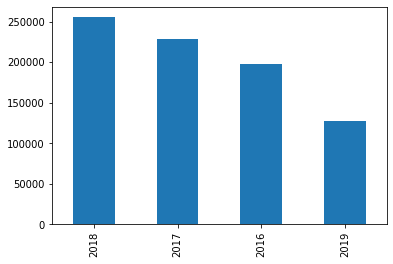

In [12]:
# How many crimes were recorded by year?
df["ao_inicio"].value_counts().plot(kind="bar")

In [13]:
df.set_index("fecha_inicio", inplace=True)

In [14]:

df_count = df.groupby(df.index.year).size().reset_index(name="obs")

<AxesSubplot:title={'center':'Crimes for Year'}, xlabel='fecha_inicio'>

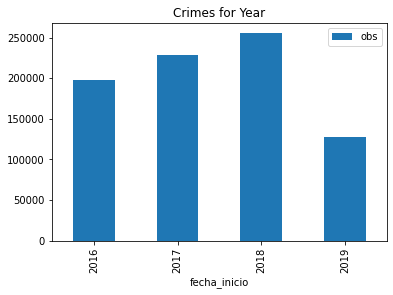

In [15]:
df_count.plot.bar(title="Crimes for Year",x="fecha_inicio", y="obs" )

In [ ]:
# Show the top 5 crimes

In [ ]:
# Calculate the accumulated rate of the top 5 crimes

In [ ]:
# Which city has the most and the less crimes in the dataset?

In [ ]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?

In [ ]:
# Do you see a trend per month or day?